In [40]:
#tutorial from https://towardsdatascience.com/visualizing-covid-19-vaccine-data-in-python-in-5-simple-steps-51bf5ab619c9
#imports libraries
import pyforest

from datetime import timedelta
from matplotlib.dates import DateFormatter, WeekdayLocator

In [4]:
#show all libraries in pyforest
dir(pyforest)
active_imports()
lazy_imports()

import pandas as pd


['from sklearn.ensemble import RandomForestClassifier',
 'import sklearn',
 'import nltk',
 'import tensorflow as tf',
 'import matplotlib as mpl',
 'import plotly.graph_objs as go',
 'import dash',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import seaborn as sns',
 'import numpy as np',
 'import gensim',
 'import lightgbm as lgb',
 'from dask import dataframe as dd',
 'import bokeh',
 'import plotly.express as px',
 'import re',
 'import xgboost as xgb',
 'from sklearn.preprocessing import OneHotEncoder',
 'import altair as alt',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import keras',
 'import spacy',
 'from sklearn.model_selection import train_test_split',
 'from openpyxl import load_workbook',
 'import pickle',
 'import matplotlib.pyplot as plt',
 'import awswrangler as wr',
 'from sklearn.manifold import TSNE',
 'import plotly as py',
 'from pyspark import SparkContext',
 'import statistics',
 'import os',
 'from sklearn import svm',
 'import 

### 1-Loading our dataframe

In [35]:
#load the data, letting Pandas know to only load a subset of columns ( date, location, total_vaccinations_per_hundred) and reading date as a datetime value.
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_vaccinations_per_hundred'], 
    parse_dates=['date'])

#create a list that contains different countries. If you want your visualization to show other countries, just make sure they match what’s available in the dataframe.
#You can find out the names of countries used in locations by using print(df['location'].unique())
countries = ['United States', 'Germany', 'United Kingdom', 'Israel']
df = df[df['location'].isin(countries)]

<IPython.core.display.Javascript object>

### 2-Summarizing our data

In [36]:
pivot = pd.pivot_table(
    data=df,  # What dataframe to use
    index='date', # The "rows" of your dataframe
    columns='location', # What values to show as columns
    values='total_vaccinations_per_hundred', # What values to aggregate
    aggfunc='mean', # How to aggregate data
    )

pivot = pivot.fillna(method='ffill') #fill in missing values

<IPython.core.display.Javascript object>

### 3-Creating our visualiztion

In [50]:
"""
We then use two dictionary comprehensions to assign all countries the color grey and the transparency of 0.75 except for the main_country, 
which is assigned a dark teal and no transparency.

"""

# Step 3: Set up key variables for the visualization
main_country = 'United States'


colors = {country:('grey' if country!= main_country else '#129583') for country in countries}
alphas = {country:(0.75 if country!= main_country else 1.0) for country in countries}

### 4-Plot all countries 
### 5- Configure Axes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

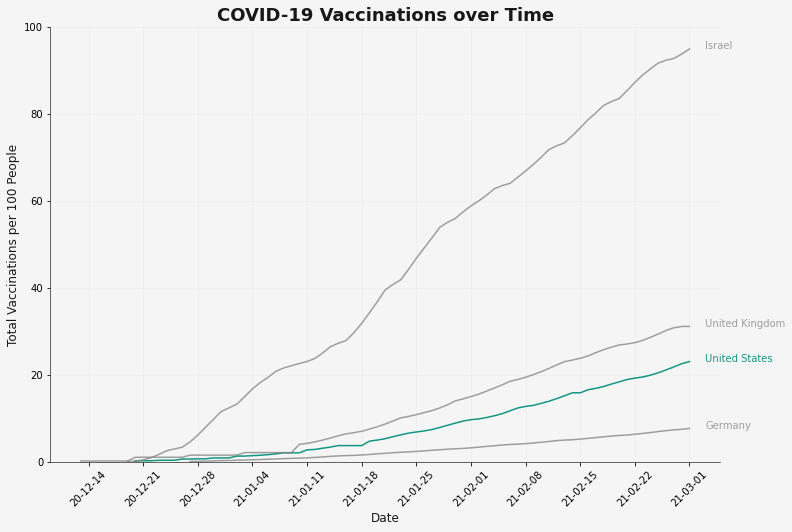

In [56]:
"""
We then loop over each country in our countries variable to plot each line individually. 
We use the index (our dates) as the x-values and the proportion of vaccinated people for y-values. 
We draw both the color and transparency from our dictionaries that we created in Step 3.

"""

"""
We then add text to our plot to show the label of the country directly on the line. 
We use the timedelta function to add 2 days to the last value of our index to create a bit of buffer between the end of the line and where the text begins.
Pass in the country’s name as the string to use and use the dictionaries to pass in color and transparency as we did to load in the lines themselves.

"""

fig, ax = plt.subplots(figsize=(12,8)) #instantiate a figure and an axis of size 12x8
fig.patch.set_facecolor('#F5F5F5') #change background color to light grey
ax.patch.set_facecolor('#F5F5F5') #change background color to light grey


for country in countries:
    ax.plot(
        pivot.index, # What to use as your x-values
        pivot[country], # What to use as your y-values
        color=colors[country], # How to color your line
        alpha=alphas[country] # What transparency to use for your line
    )

    ax.text(
        x = pivot.index[-1] + timedelta(days=2), #Where to position your text relative to the x-axis
        y = pivot[country].max(), # How high to position your text. Can use max func. for each country value since the proportion will only ever increase
        color = colors[country], # What color to give your text
        s = country, # What to write
        alpha=alphas[country] # What transparency to use
    )
# Step 5: Configures axes
## A) Format what shows up on axes and how it's displayed 

date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=(0), interval=1))
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
plt.ylim(0,100)

## B) Customizing axes and adding a grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#3f3f3f')
ax.spines['left'].set_color('#3f3f3f')
ax.grid(alpha=0.1)

## C) Adding a title and axis labels
plt.ylabel('Total Vaccinations per 100 People', fontsize=12, alpha=0.9)
plt.xlabel('Date', fontsize=12, alpha=0.9)
plt.title('COVID-19 Vaccinations over Time', fontsize=18, weight='bold', alpha=0.9)


# D) Celebrate!
plt.savefig('vaccine')
plt.show()



<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>